In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
%matplotlib inline

In [2]:
filename='../data/winequality-white (1).csv'

In [3]:
colnames = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
df = pd.read_csv(filename,delimiter=';',names=colnames, header=None)
df = df.drop([0])

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 1 to 4898
Data columns (total 12 columns):
fixed acidity           4898 non-null object
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null float64
dtypes: float64(11), object(1)
memory usage: 497.5+ KB


In [6]:
df.shape

(4898, 12)

In [7]:
pd.isnull(df).any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [8]:
v= df.groupby('quality')[['fixed acidity']].count()
v.sort_values('fixed acidity').reset_index()
v.columns=['fixed acidity']
v

,fixed acidity
quality,
3.0,20
4.0,163
5.0,1457
6.0,2198
7.0,880
8.0,175
9.0,5


In [9]:
df['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

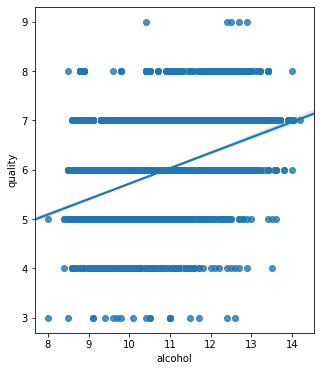

In [10]:
f, ax = plt.subplots(figsize=(5,6))
sns.regplot(x='alcohol', y='quality', data=df,ax=ax)

In [11]:
df['quality'].value_counts(normalize=True)

6.0    0.448755
5.0    0.297468
7.0    0.179665
8.0    0.035729
4.0    0.033279
3.0    0.004083
9.0    0.001021
Name: quality, dtype: float64

In [12]:
sugar= df.groupby('quality')[['residual sugar']].mean()
sugar.sort_values('residual sugar').reset_index()
sugar.columns=['Sugar Level']
sugar

,Sugar Level
quality,
3.0,6.392500
4.0,4.628221
5.0,7.334969
6.0,6.441606
7.0,5.186477
8.0,5.671429
9.0,4.120000


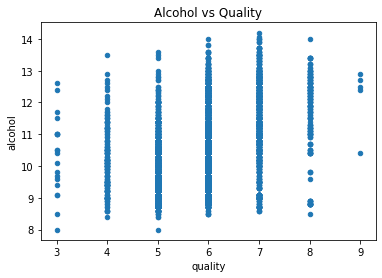

In [13]:
df.plot(kind='scatter', x='quality', y='alcohol', title='Alcohol vs Quality')

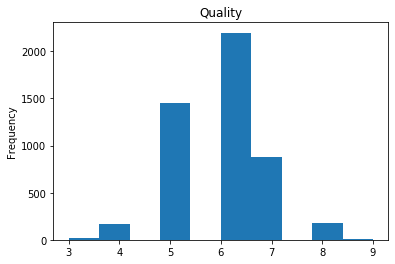

In [14]:
df['quality'].plot(kind='hist', title='Quality')

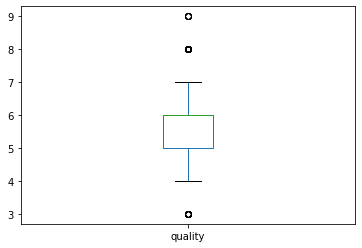

In [15]:
df['quality'].plot(kind='box')

In [16]:
df.corr()
#from the correlation, density and alcohol have relationship affecting the wine quality. Between 0.3-0.4 said to have medium coorelation. Alcohol is close to 0.5 and is close to high degree correlation. Volatile acidity has below moderate relationship with quality.

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678
alcohol,0.067718,-0.075729,-0.450631,-0.360189,-0.250104,-0.448892,-0.780138,0.121432,-0.017433,1.000000,0.435575


In [17]:
df['volatile acidity'].describe()

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile acidity, dtype: float64

In [18]:
df['alcohol'].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

In [19]:
df['density'].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

In [20]:
def alcohol_function(x):
    if x>=10.51:
        return 'high'
    else:
        return 'low'

In [21]:
df['alcohol_category'] = df['alcohol'].apply(alcohol_function)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_category
1,7,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,low
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,low
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,low
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,low
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,low


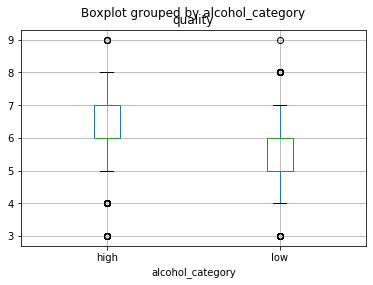

In [22]:
df.boxplot(column='quality', by='alcohol_category')

In [23]:
df['density_category']= df['density'].apply(lambda x: 'high density' if x>=0.99 else 'low density')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_category,density_category
1,7,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,low,high density
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,low,high density
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,low,high density
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,low,high density
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,low,high density


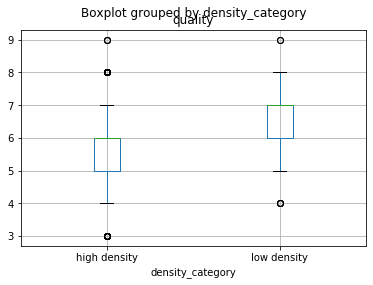

In [26]:
df.boxplot(column='quality', by='density_category')